In [268]:
import pandas as pd
import numpy as np
import missingno as msno
import os
import joblib
from sklearn import preprocessing
from category_encoders import one_hot
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [225]:
np.random.seed(0)
rng = np.random.default_rng()

# Numero de registros
N = 5000

#Clientes
# Edad entre 18 y 60 annos
Edad = rng.integers(18,60, size=N)

#Registro en annos de trabajo
Anno_trabajo= np.random.uniform(0, 40, size=N)

# Genero:
Genero = np.random.choice(['Hombre', 'Mujer'], size=N)

# Educacion:
Educacion = np.random.choice(['Primaria', 'Secundaria', 'Universidad'], size=N)


#Estado Civil
Estado_civil = np.random.choice(['Soltero', 'Casado', 'Divorciado'], size=N)

#Tipo Cliente
Tipo_cliente= np.random.choice(['ConsumidorFinal', 'Monotributista', 'ResponsableInscripto'], size=N)

#Nivel puesto cliente
Puesto_cliente= np.random.choice(['Duenno', 'PersonalCompras', 'Ayudante'], size=N)

#-------------------------------------------------------------------
#Venta 
#Cantidad de compras cliente en el mes
Cantidad_compras= rng.integers(1,8, size=N)

#Cantidad de articulos
Cantidad_articulos= Cantidad_compras * rng.integers(20,40, size=N)

#Venta: con minimo de compra
Total_venta= Cantidad_articulos * rng.integers(30,50, size=N) 

#Envio
Envio= np.random.choice(['Si', 'No'], size=N)


#Pago al contado
Pago= np.random.choice(['Si', 'No'], size=N)

#Descuento obtenido en porcentaje sin relacion a la compra
Descuento= Anno_trabajo /3 * rng.integers(5, size=N)

#Calificacion de la compra desde 0="Mala" a 5="Excelente"

Calificacion= rng.integers(6, size=N) #np.random.normal(1, 5, size=N)




# Create a DataFrame
df = pd.DataFrame({'Edad': Edad, 'Anno_trabajo': Anno_trabajo, 'Genero': Genero, 'Educacion': Educacion, 'Estado_civil': Estado_civil, 'Tipo_cliente': Tipo_cliente, 'Puesto_cliente': Puesto_cliente, 'Total_venta': Total_venta, 'Envio': Envio, 'Cantidad_articulos': Cantidad_articulos, 'Cantidad_compras': Cantidad_compras, 'Pago': Pago, 'Descuento': Descuento,'Calificacion': Calificacion})
df.head(5)

,Edad,Anno_trabajo,Genero,Educacion,Estado_civil,Tipo_cliente,Puesto_cliente,Total_venta,Envio,Cantidad_articulos,Cantidad_compras,Pago,Descuento,Calificacion
0,59,21.952540,Mujer,Primaria,Casado,ConsumidorFinal,PersonalCompras,8820,Si,196,7,No,21.952540,2
1,31,28.607575,Mujer,Secundaria,Soltero,ResponsableInscripto,Duenno,2652,Si,68,2,Si,28.607575,1
2,57,24.110535,Mujer,Primaria,Soltero,ResponsableInscripto,PersonalCompras,1392,No,29,1,No,32.147380,5
3,41,21.795327,Hombre,Universidad,Divorciado,ConsumidorFinal,PersonalCompras,7260,Si,165,5,No,29.060436,1
4,20,16.946192,Hombre,Universidad,Divorciado,Monotributista,Duenno,2030,No,58,2,Si,16.946192,4


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                5000 non-null   int64  
 1   Anno_trabajo        5000 non-null   float64
 2   Genero              5000 non-null   object 
 3   Educacion           5000 non-null   object 
 4   Estado_civil        5000 non-null   object 
 5   Tipo_cliente        5000 non-null   object 
 6   Puesto_cliente      5000 non-null   object 
 7   Total_venta         5000 non-null   int64  
 8   Envio               5000 non-null   object 
 9   Cantidad_articulos  5000 non-null   int64  
 10  Cantidad_compras    5000 non-null   int64  
 11  Pago                5000 non-null   object 
 12  Descuento           5000 non-null   float64
 13  Calificacion        5000 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 547.0+ KB


In [227]:
df.describe()

,Edad,Anno_trabajo,Total_venta,Cantidad_articulos,Cantidad_compras,Descuento,Calificacion
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.679000,19.878836,4660.767400,118.041400,4.008000,13.504892,2.505800
std,12.166905,11.565649,2645.168937,63.812858,1.989152,13.439492,1.695329
min,18.000000,0.002898,600.000000,20.000000,1.000000,0.000000,0.000000
25%,28.000000,10.037308,2496.000000,66.000000,2.000000,1.938502,1.000000
50%,39.000000,19.695855,4420.000000,114.000000,4.000000,9.569580,2.000000
75%,49.000000,29.895893,6468.000000,162.000000,6.000000,21.803542,4.000000
max,59.000000,39.998561,13034.000000,273.000000,7.000000,53.331414,5.000000


Distribucion de los datos numericos

array([[<AxesSubplot: title={'center': 'Edad'}>,
        <AxesSubplot: title={'center': 'Anno_trabajo'}>,
        <AxesSubplot: title={'center': 'Total_venta'}>],
       [<AxesSubplot: title={'center': 'Cantidad_articulos'}>,
        <AxesSubplot: title={'center': 'Cantidad_compras'}>,
        <AxesSubplot: title={'center': 'Descuento'}>],
       [<AxesSubplot: title={'center': 'Calificacion'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

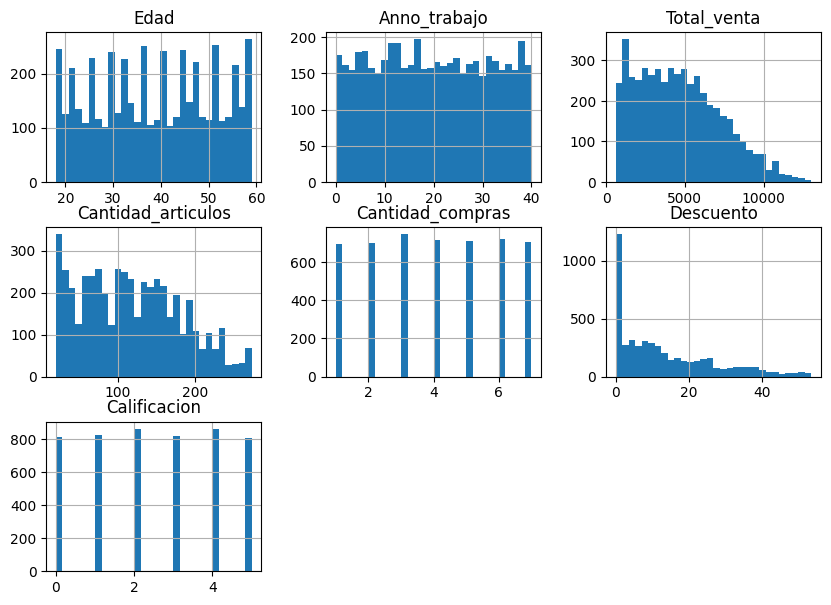

In [228]:
df[['Edad', 'Anno_trabajo', 'Total_venta','Cantidad_articulos','Cantidad_compras','Descuento','Calificacion']].hist(bins=30, figsize=(10, 7))

Distribucion de datos categoricos

<AxesSubplot: title={'center': 'Genero'}>

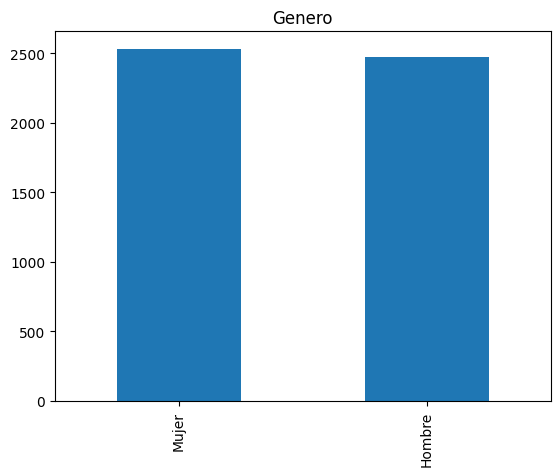

In [229]:
df['Genero'].value_counts().plot(kind='bar', title='Genero')

<AxesSubplot: title={'center': 'Tipo_cliente'}>

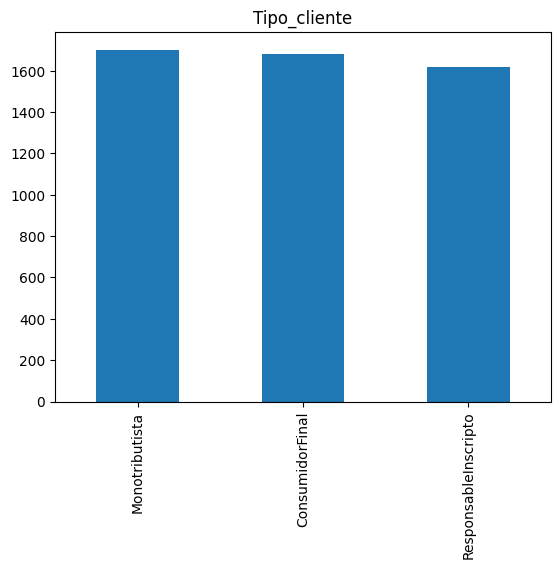

In [230]:
df['Tipo_cliente'].value_counts().plot(kind='bar', title='Tipo_cliente')

<AxesSubplot: title={'center': 'Estado_civil'}>

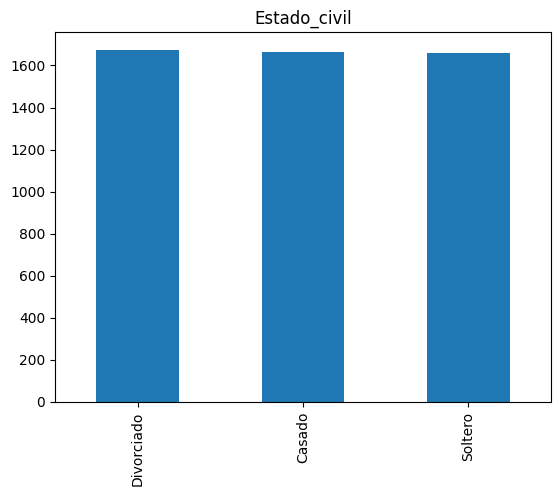

In [231]:
df['Estado_civil'].value_counts().plot(kind='bar', title='Estado_civil')

Distribucion de datos Binarios

<AxesSubplot: title={'center': 'Pago'}>

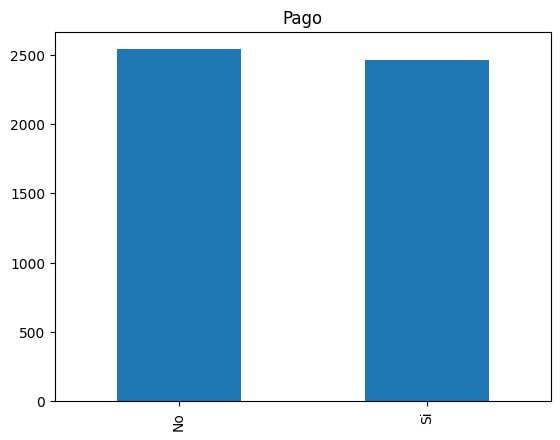

In [232]:
df['Pago'].value_counts().plot(kind='bar', title='Pago')

<AxesSubplot: title={'center': 'Envio'}>

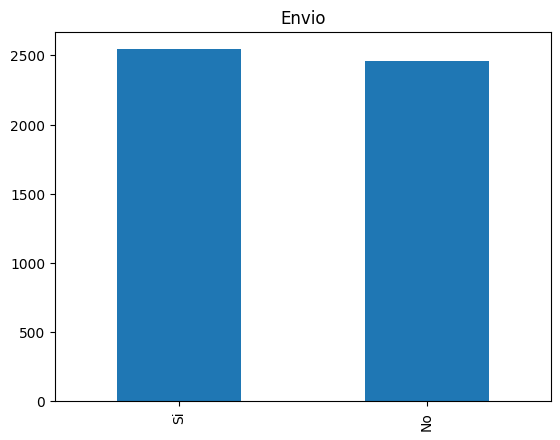

In [233]:
df['Envio'].value_counts().plot(kind='bar', title='Envio')

Analisis de relaciones entre variables numericas

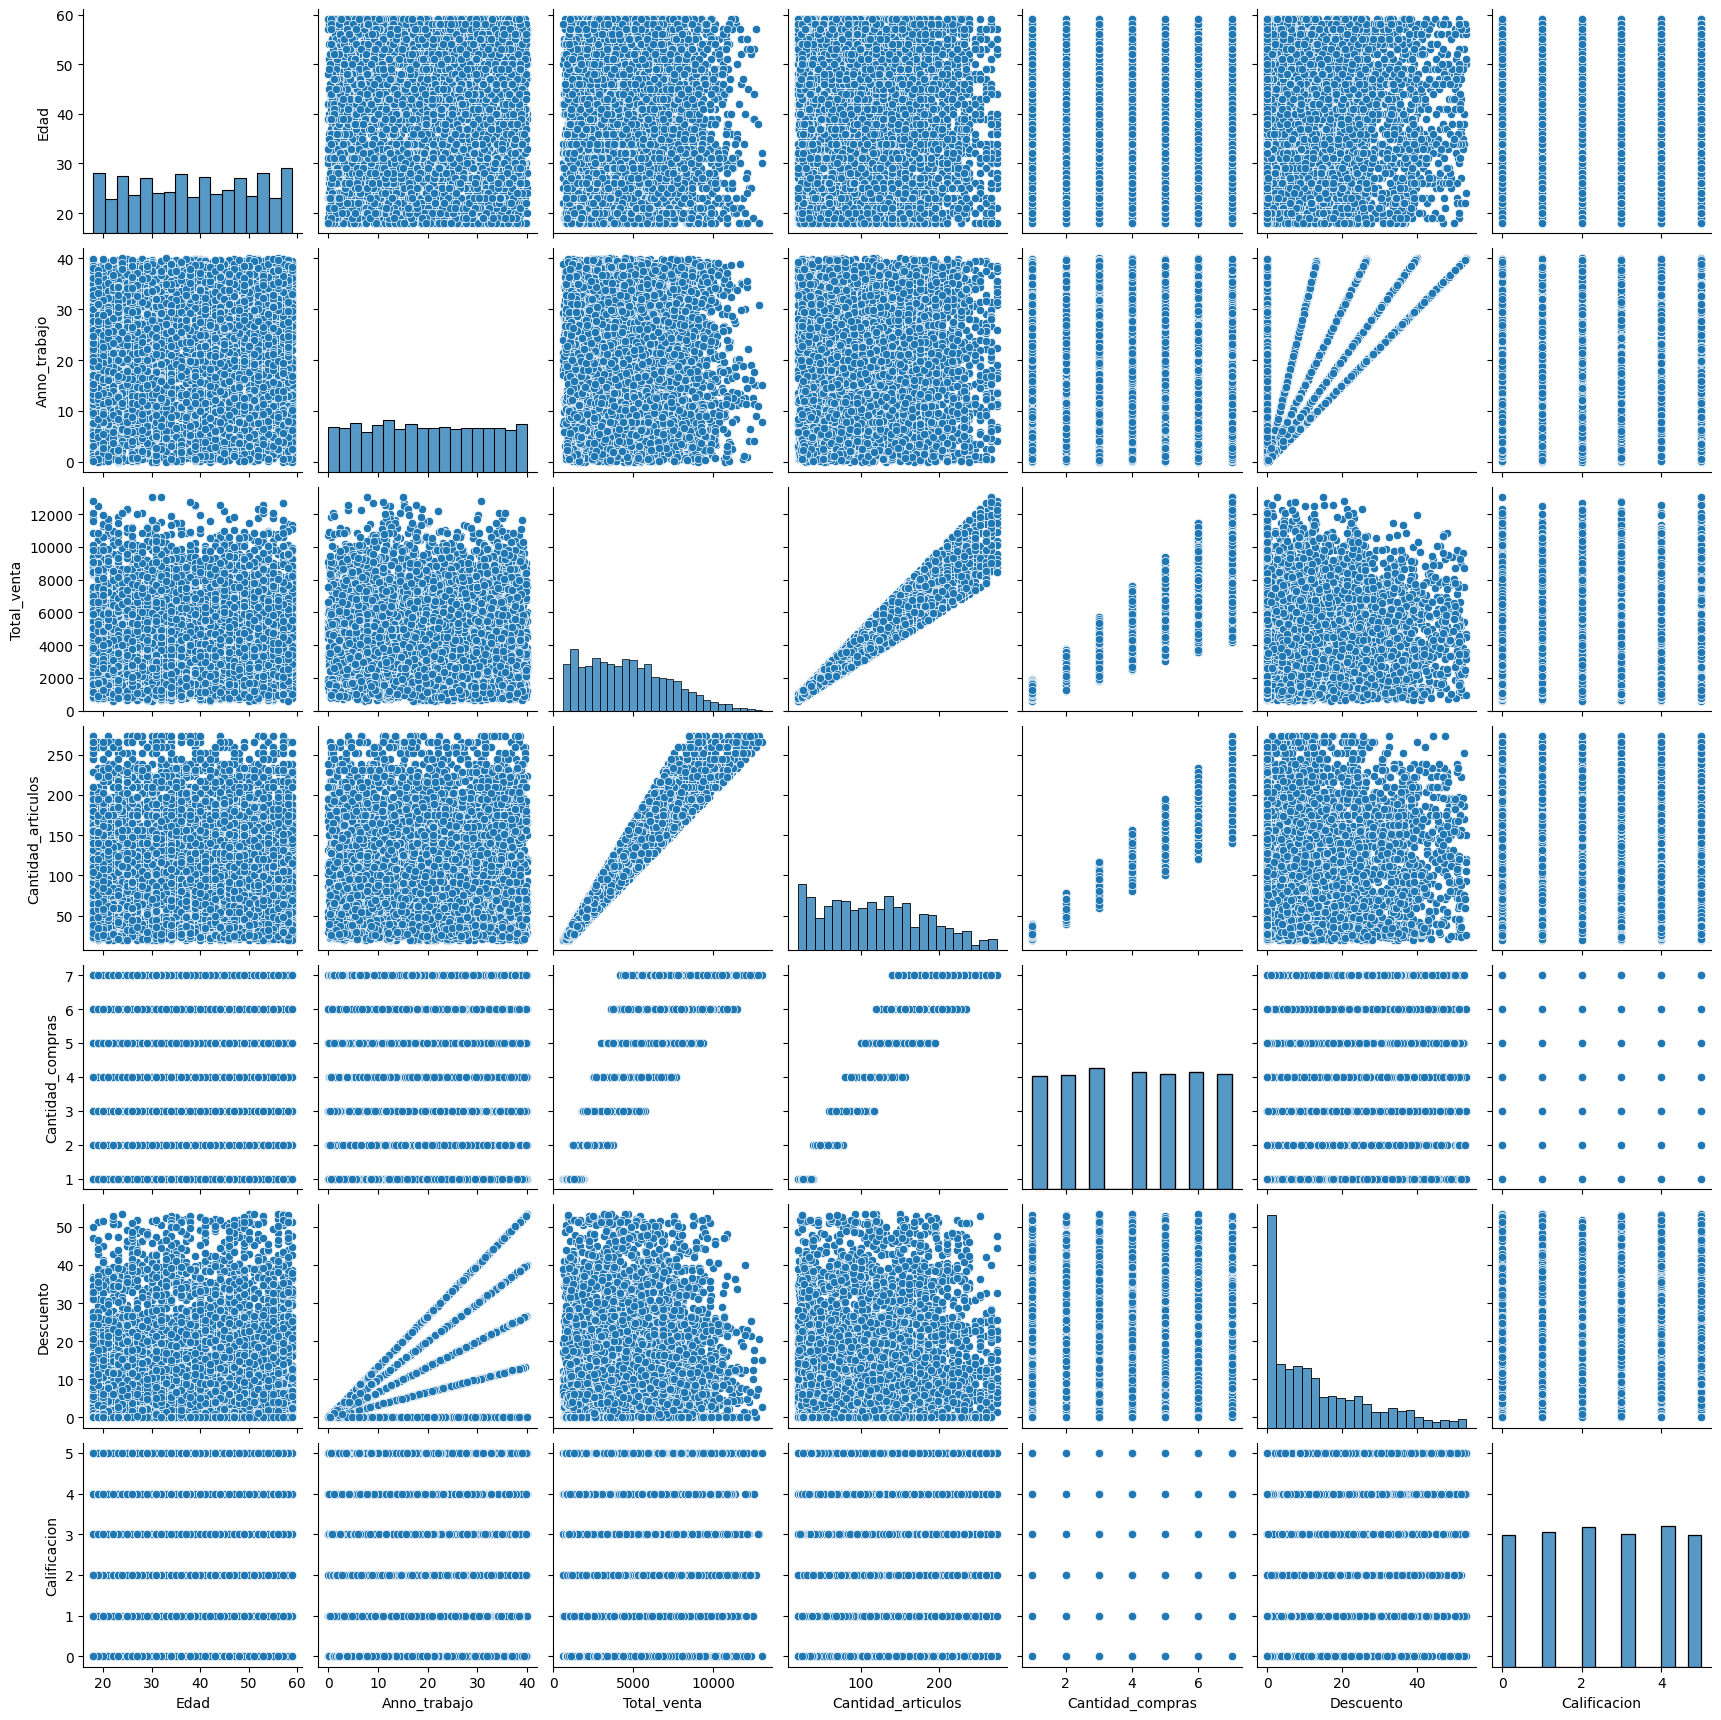

In [234]:
sns.pairplot(df, vars=['Edad', 'Anno_trabajo', 'Total_venta','Cantidad_articulos','Cantidad_compras','Descuento','Calificacion'])

Analizo la correlacion entre las mismas

In [235]:
df[['Edad', 'Anno_trabajo', 'Total_venta','Cantidad_articulos','Cantidad_compras','Descuento','Calificacion']].corr()

,Edad,Anno_trabajo,Total_venta,Cantidad_articulos,Cantidad_compras,Descuento,Calificacion
Edad,1.000000,0.009053,0.001873,-0.001401,0.001115,0.023145,0.017707
Anno_trabajo,0.009053,1.000000,0.014410,0.022170,0.010501,0.596981,-0.002332
Total_venta,0.001873,0.014410,1.000000,0.956494,0.872893,-0.009523,-0.018184
Cantidad_articulos,-0.001401,0.022170,0.956494,1.000000,0.915379,0.000527,-0.019910
Cantidad_compras,0.001115,0.010501,0.872893,0.915379,1.000000,-0.002951,-0.014013
Descuento,0.023145,0.596981,-0.009523,0.000527,-0.002951,1.000000,0.010176
Calificacion,0.017707,-0.002332,-0.018184,-0.019910,-0.014013,0.010176,1.000000


Analisis de variables categoricas

<AxesSubplot: xlabel='Genero', ylabel='Total_venta'>

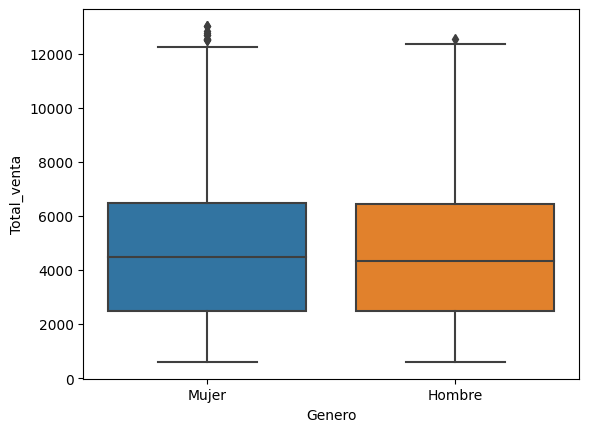

In [236]:
sns.boxplot(x='Genero', y='Total_venta', data=df)

<AxesSubplot: xlabel='Pago', ylabel='Total_venta'>

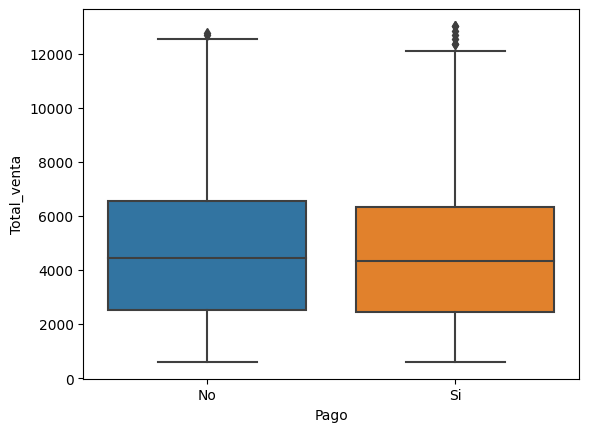

In [237]:
sns.boxplot(x='Pago', y='Total_venta', data=df)

<AxesSubplot: xlabel='Envio', ylabel='Total_venta'>

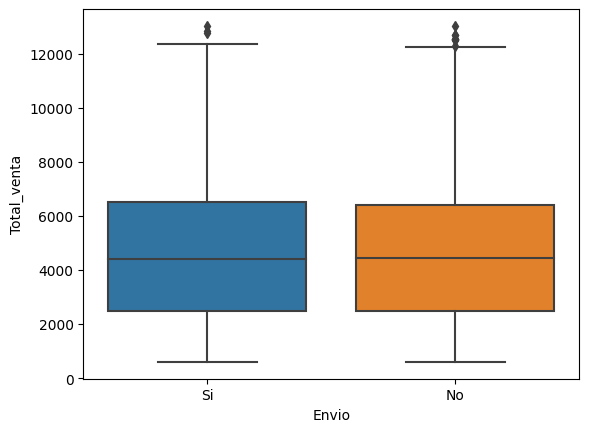

In [238]:
sns.boxplot(x='Envio', y='Total_venta', data=df)

<AxesSubplot: xlabel='Educacion', ylabel='Total_venta'>

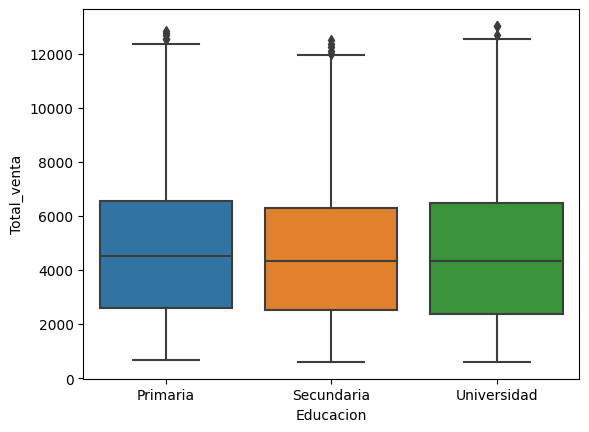

In [239]:
sns.boxplot(x='Educacion', y='Total_venta', data=df)

<AxesSubplot: xlabel='Estado_civil', ylabel='Total_venta'>

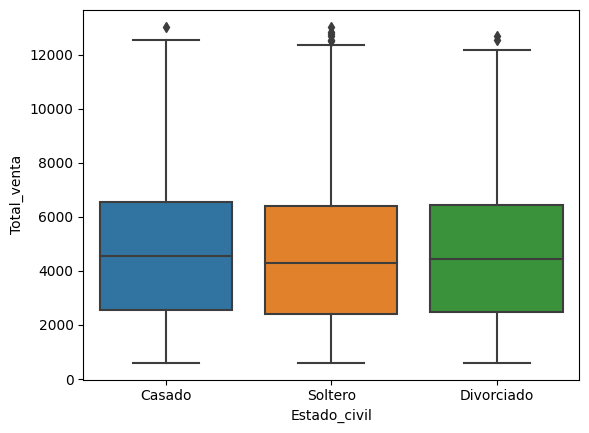

In [240]:
sns.boxplot(x='Estado_civil', y='Total_venta', data=df)

<AxesSubplot: xlabel='Tipo_cliente', ylabel='Total_venta'>

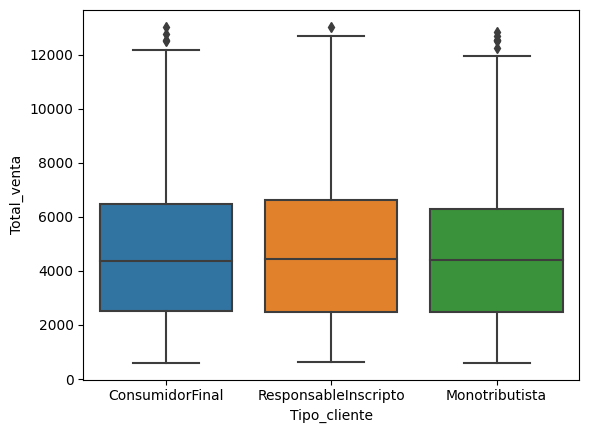

In [241]:
sns.boxplot(x='Tipo_cliente', y='Total_venta', data=df)

<AxesSubplot: xlabel='Puesto_cliente', ylabel='Total_venta'>

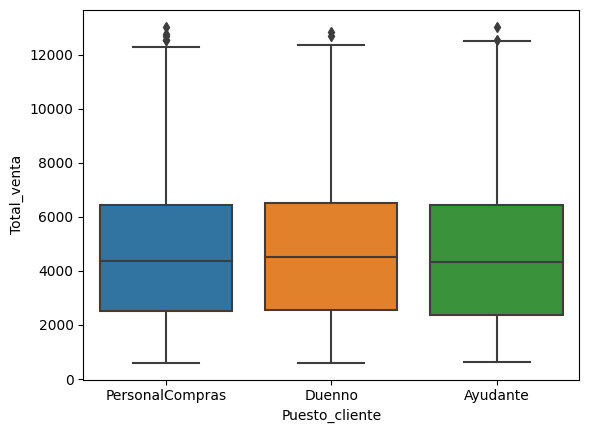

In [242]:
sns.boxplot(x='Puesto_cliente', y='Total_venta', data=df)

Se puede apreciar algunos outliers que a simple vista no presentarian problema.

Seleccion de variables

In [243]:
Variables_quitar=['Estado_civil','Puesto_cliente','Genero','Educacion']

In [244]:
df=df.drop(labels=Variables_quitar, axis=1)
df.head(5)

,Edad,Anno_trabajo,Tipo_cliente,Total_venta,Envio,Cantidad_articulos,Cantidad_compras,Pago,Descuento,Calificacion
0,59,21.952540,ConsumidorFinal,8820,Si,196,7,No,21.952540,2
1,31,28.607575,ResponsableInscripto,2652,Si,68,2,Si,28.607575,1
2,57,24.110535,ResponsableInscripto,1392,No,29,1,No,32.147380,5
3,41,21.795327,ConsumidorFinal,7260,Si,165,5,No,29.060436,1
4,20,16.946192,Monotributista,2030,No,58,2,Si,16.946192,4


Codificacion de variables Categoricas y Binarias

In [245]:
df_encoded = pd.get_dummies(df, columns=[ 'Pago','Envio','Tipo_cliente'])
df_encoded.head(5)

,Edad,Anno_trabajo,Total_venta,Cantidad_articulos,Cantidad_compras,Descuento,Calificacion,Pago_No,Pago_Si,Envio_No,Envio_Si,Tipo_cliente_ConsumidorFinal,Tipo_cliente_Monotributista,Tipo_cliente_ResponsableInscripto
0,59,21.952540,8820,196,7,21.952540,2,1,0,0,1,1,0,0
1,31,28.607575,2652,68,2,28.607575,1,0,1,0,1,0,0,1
2,57,24.110535,1392,29,1,32.147380,5,1,0,1,0,0,0,1
3,41,21.795327,7260,165,5,29.060436,1,1,0,0,1,1,0,0
4,20,16.946192,2030,58,2,16.946192,4,0,1,1,0,0,1,0


Escalamiento de variables numericas

In [251]:
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(df_encoded)

Definicion de variable Target y datos de entrenamiento-testeo

In [252]:
X = df_encoded.drop('Total_venta', axis=1)
y = df_encoded['Total_venta']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000, 13) (1000, 13) (4000,) (1000,)


Inicio el modelo de regresion linea

In [254]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

                            OLS Regression Results                            
Dep. Variable:            Total_venta   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     4300.
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        16:11:12   Log-Likelihood:                -32258.
No. Observations:                4000   AIC:                         6.454e+04
Df Residuals:                    3989   BIC:                         6.461e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

C:\Users\Lauti\AppData\Local\Temp\ipykernel_18132\3673526186.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ols_model.resid)


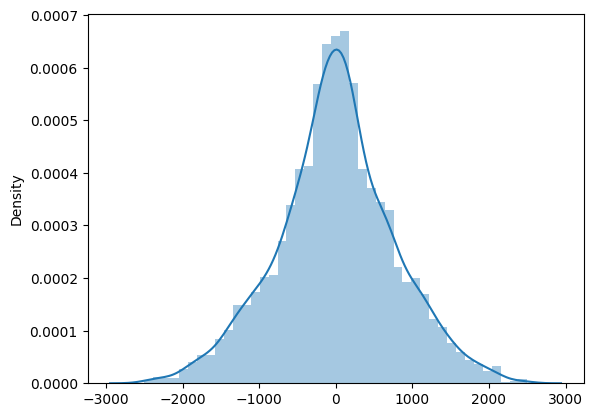

In [256]:
#Creo una variable de interseccion
X_train_const = sm.add_constant(X_train)

#Entreno el modelo
ols_model = sm.OLS(y_train, X_train_const).fit()


print(ols_model.summary())

# Residuales
sns.distplot(ols_model.resid)


# Conduct Durbin-Watson Test para deteccion de autocorrelacion
print(f'Durbin-Watson statistic: {sm.stats.durbin_watson(ols_model.resid)}')

# Conduct Breusch-Pagan Teste para heteroscedasticidad
_, pval, _, _ = sm.stats.diagnostic.het_breuschpagan(ols_model.resid, ols_model.model.exog)
print(f'Breusch-Pagan test p-value: {pval}')

La matriz presenta un problema de singularidad, esto es porque la cree con variables aleatorias. Si bien hay variables relacionadas, estas no dan una buena correlacion con la mayoria

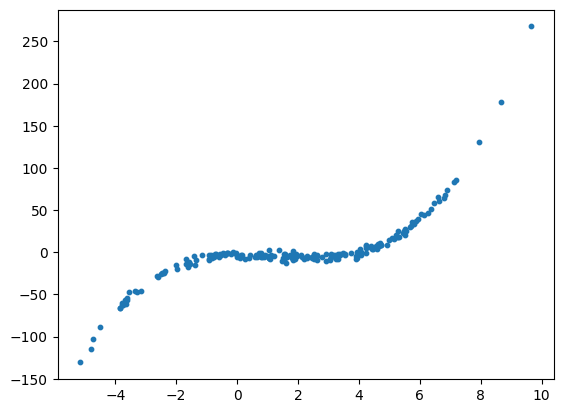

In [258]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Generate a dataset with a quadratic relationship
x = 2 - 3 * np.random.normal(0, 1, 200)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 200)

# Convert x from a 1D array to a 2D array
x = x[:, np.newaxis]

# Plot the data
plt.scatter(x, y, s=10)
plt.show()


Division de los datos en los conjuntos de entramiento y prueba

In [261]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [262]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

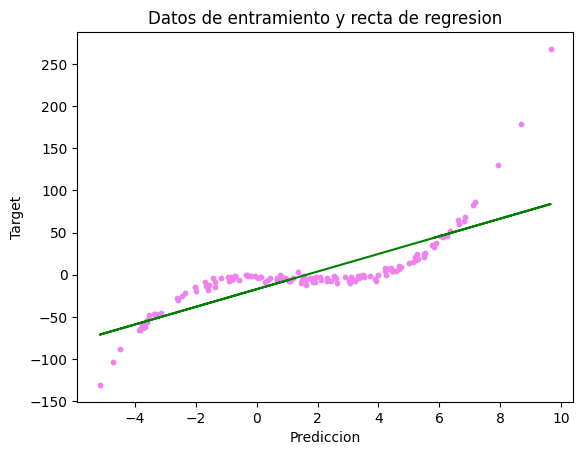

In [265]:
plt.scatter(X_train, y_train, color='violet', s=10)
plt.plot(X_train, y_train_pred, color='green')
plt.title('Datos de entramiento y recta de regresion')
plt.xlabel('Prediccion')
plt.ylabel('Target')
plt.show()

Calculo de Metricas

In [267]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Entrenamiento: RMSE = ", rmse_train, ", R^2 = ", r2_train)
print("Prueba: RMSE = ", rmse_test, ", R^2 = ", r2_test)

Training set: RMSE =  25.43169836641035 , R^2 =  0.6407607778312956
Test set: RMSE =  18.548762108630317 , R^2 =  0.326892891550029
